In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns
import datetime
from tqdm import tqdm, trange
tqdm.pandas()

rides = pd.read_csv('../data/rideshare_kaggle.csv')

C:\Users\evanj\anaconda3\lib\site-packages\tqdm\std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
rides.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

<AxesSubplot:>

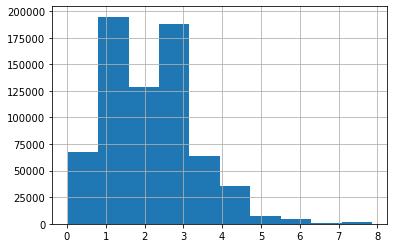

In [21]:
rides.distance.hist()

In [4]:
rides.source.unique()

array(['Haymarket Square', 'Back Bay', 'North End', 'North Station',
       'Beacon Hill', 'Boston University', 'Fenway', 'South Station',
       'Theatre District', 'West End', 'Financial District',
       'Northeastern University'], dtype=object)

In [5]:
rides.destination.unique()

array(['North Station', 'Northeastern University', 'West End',
       'Haymarket Square', 'South Station', 'Fenway', 'Theatre District',
       'Beacon Hill', 'Back Bay', 'North End', 'Financial District',
       'Boston University'], dtype=object)

In [6]:
rides['weekday'] = rides.progress_apply(lambda row: datetime.datetime.strptime(row['datetime'], '%Y-%m-%d %H:%M:%S').weekday(), axis=1)

100%|███████████████████████████████████████████████████████████████████████| 693071/693071 [00:15<00:00, 44851.62it/s]


<AxesSubplot:>

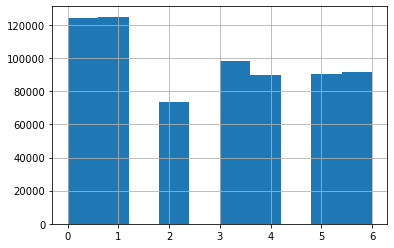

In [18]:
rides.weekday.hist()

In [29]:
sources = rides.source.to_numpy()
destinations = rides.destination.to_numpy()
ride_corr = np.zeros((len(rides.source.unique()),len(rides.destination.unique())))
for source in tqdm(rides.source.unique()):
    for destination in rides.source.unique():
        source_idx = np.where(rides.source.unique()==source)[0][0]
        destination_idx = np.where(rides.destination.unique()==destination)[0][0]
        ride_corr[source_idx,destination_idx] = len(np.intersect1d(np.where(sources==source),np.where(destinations==destination)))

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:13<00:00,  1.12s/it]


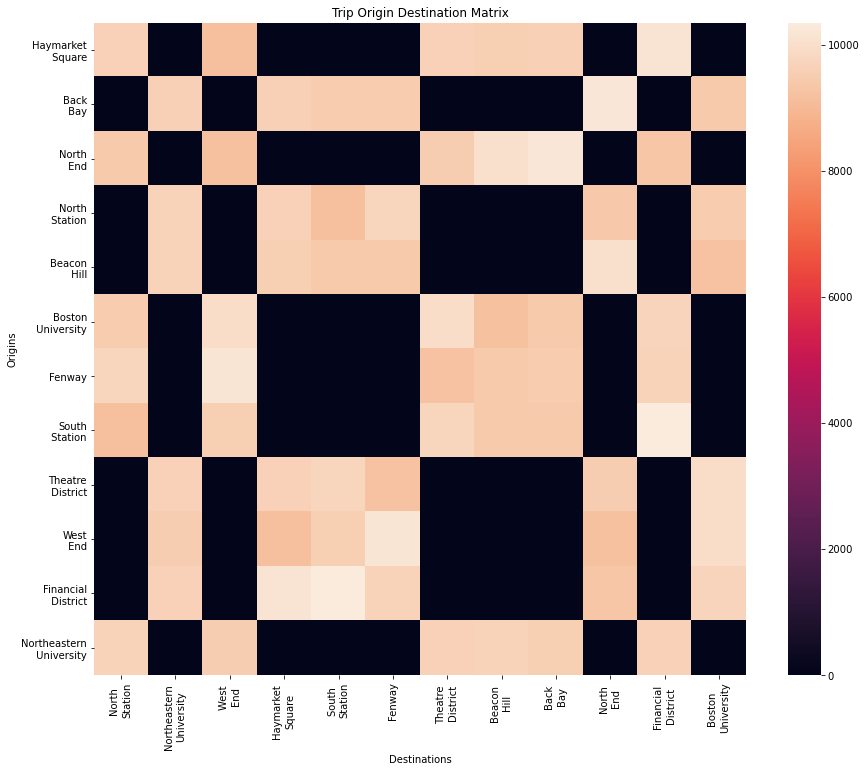

In [31]:
fig,ax = plt.subplots(figsize=(15,12))
ax = sns.heatmap(ride_corr, square=True)
ax.set_title('Trip Origin Destination Matrix')
ax.set_ylabel('Origins')
source_labels = [s.replace(' ','\n ') for s in rides.source.unique()]
ax.set_yticklabels(source_labels, rotation='horizontal')
ax.set_xlabel('Destinations')
destination_labels = [s.replace(' ',' \n') for s in rides.destination.unique()]
ax.set_xticklabels(destination_labels, rotation='vertical')
plt.savefig('../figures/scooter_od_matrix.png',format='png')
plt.show()